<a href="https://colab.research.google.com/github/sasi6996/EAI6000/blob/master/Week_3_Lab_Fashion_MNIST_Sasank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sasank Kumar Kantana
- Course: EAI6000 
- Date: 03/04/2020

In this lab we will train a neural network model to classify images of clothing. 

The lab is designed to be run using Google Colab, but also can be run as a normal jupyter notebook with minor modifications.

This lab uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


TensorFlow 2.x selected.


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


## Import the Fashion MNIST dataset

In [3]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


Examine the dataset size.
1. What are the sizes of each image? 
2. How many categories are there?
3. How many images are there in the test and training sets?
4. What are the range of values for the images? 

In [5]:
print('Train_images', train_images.shape, train_labels.shape)
print('Test_images', (test_images.shape, test_labels.shape))
# summarize pixel values
print('Train_images', train_images.min(), train_images.max(), train_images.mean(), train_images.std())
print('Test_images', test_images.min(), test_images.max(), test_images.mean(), test_images.std())


Train_images (60000, 28, 28) (60000,)
Test_images ((10000, 28, 28), (10000,))
Train_images 0 255 72.94035223214286 90.02118235130519
Test_images 0 255 73.14656658163265 89.87325907809718



*   From the data the size of each image is found to be 28 * 28. 
*   There are in total of 10 lables.

*   The test  set has the 10,000 images where as the training set has 60,000 images
*   The Range values are between 0 to 255.





Preprocess the data by scaling the pixel values of all images to fall between 0 and 1.

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format  display the first 10 images from the *training set* and display the class name below each image.


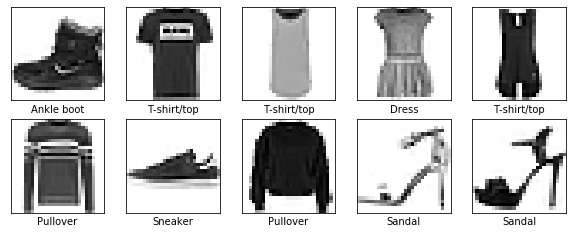

In [7]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Using Keras, build a neural network with a single hidden layer consisting of 64 neurons. Remember that you will either have to reshape the image data into 1D vectors, or use a flatten layer at the input.
1. Set up the model layers
2. Compile the model 
3. Print the model summary

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(64, activation='relu'),
     keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


## Train the model

Train the model on the training images for 20 epochs.




In [11]:

cs = model.fit(train_images, train_labels, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.5128 - accuracy: 0.8203
Epoch 2/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3866 - accuracy: 0.8611
Epoch 3/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3505 - accuracy: 0.8727
Epoch 4/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3268 - accuracy: 0.8806
Epoch 5/20
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3095 - accuracy: 0.8866
Epoch 6/20
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2945 - accuracy: 0.8923
Epoch 7/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2843 - accuracy: 0.8940
Epoch 8/20
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2732 - accuracy: 0.8990
Epoch 9/20
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2657 - accuracy: 0.9014
Epoch 10/20
60

Evaluate the accuracy of the model on the test dataset. How does it compare with the training accuracy? Is it likely overfitting or underfitting?

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3486 - accuracy: 0.8819

Test accuracy: 0.8819


In [13]:
train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)
print('\nTest accuracy:', train_acc)

60000/60000 - 2s - loss: 0.1932 - accuracy: 0.9282

Test accuracy: 0.9282167


Accuracvy on test data is 0.88 which is a good number but train set has accuracy of 0.92. That means we have overfitting. 

### Make predictions

The outputs layer of the model contains predictions about the classification for each image. 

In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
class_predictions = model.predict_classes(test_images)
prediction_probabilities = probability_model.predict(test_images)

In [0]:
predictions = probability_model.predict(test_images)

In [16]:
predictions[0]

array([5.2711022e-07, 8.5919914e-15, 1.7145941e-11, 5.3717777e-12,
       2.1710393e-09, 1.2812506e-05, 7.0160749e-10, 4.3058246e-03,
       9.9664155e-10, 9.9568081e-01], dtype=float32)

In [17]:
prediction_probabilities.shape


(10000, 10)

In [18]:
class_predictions.shape

(10000,)

Examine the shape of the variable 'prediction_probabilities'. How is it different from class_predictions? What do the dimensions correspond to?

Shape of prediction probnability is (10000, 10). while class_prediction has shape of (10000,)

The following functions plot the image and a bar graph of the predicted probabilities. Using these functions, make a plot of the first 25 test images that were incorrectly classified along with their predicted probabilities. Interpret these images - what sort of images tend to be misclassified?

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [20]:
misclassified = np.where(class_predictions != test_labels)
misclassified

(array([  17,   23,   25, ..., 9977, 9979, 9989]),)

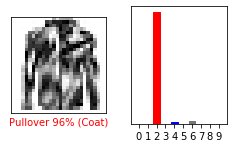

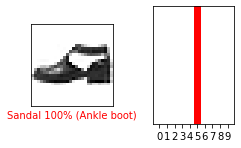

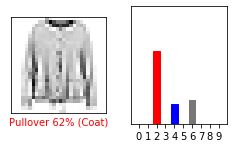

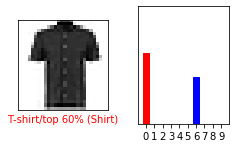

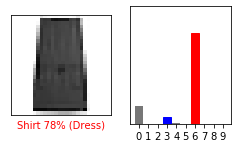

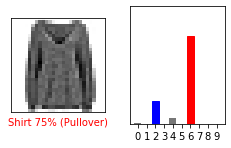

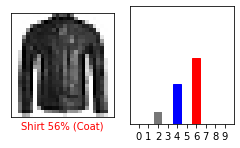

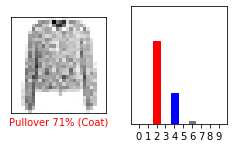

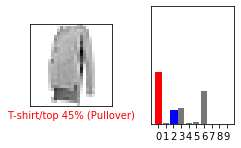

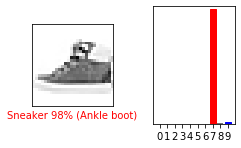

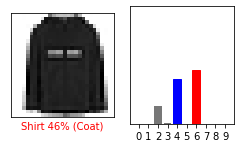

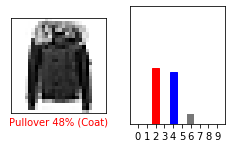

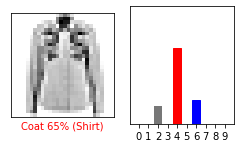

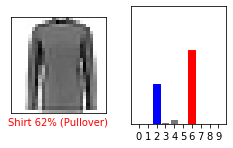

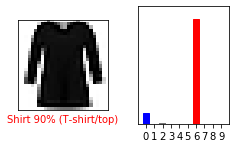

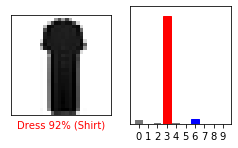

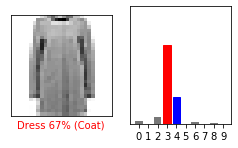

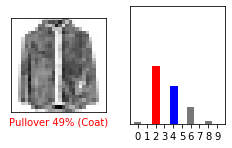

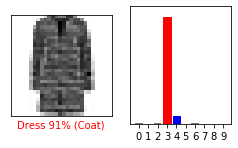

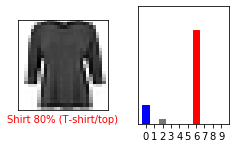

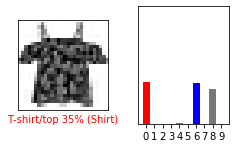

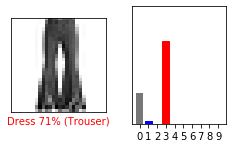

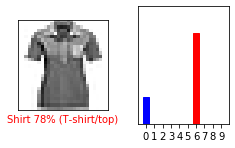

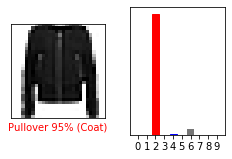

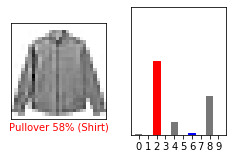

In [21]:

count = 0
for i in range(len(test_labels)):
  if np.argmax(prediction_probabilities[i]) != test_labels[i]:
    count += 1
    if count <= 25:
      num_rows = 5
      num_cols = 5
      num_images = num_rows*num_cols
      plt.figure(figsize=(2*2*num_cols, 2*num_rows))
      plt.subplot(num_rows, 2*num_cols+2, 2*count+1)
      plot_image(i, prediction_probabilities[i], test_labels, test_images)
      plt.subplot(num_rows, 2*num_cols+2, 2*count+2)
      plot_value_array(i, prediction_probabilities[i], test_labels)
      plt.tight_layout()
      plt.show()



*  It is seen that mostly same looking items has more chance of being missclassified. like shirts and pullovers, sandels and ankle boots.


Plot a confusion matrix of the predictions. Which misclassifications are the most common?

In [0]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 


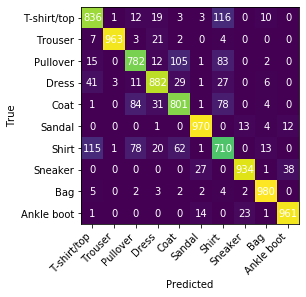

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels,class_predictions)
fig, ax = plt.subplots()
im = ax.imshow(cm)
ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
ax.set_xticklabels(list(class_names), rotation=45, ha="right")
ax.set_yticklabels(list(class_names))
ax.set_ylabel('True')
ax.set_xlabel('Predicted')
for i in range(100):
    ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

Here if we keenly observe, higly misclassified vaues are seems to be predicted as pulovers which basically is 123 for shirt . 

followed by shirts classified as t-shirt or top.
least classified class is sandle, ankle boot, sandal, coat.
